In [6]:
!pip install yfinance
!pip install --upgrade pip


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
ticker = '^GSPC'
start_date = '2010-01-01'
end_date = '2025-07-09'

df = yf.download(ticker, start = start_date, end = end_date, auto_adjust = True)
df.info()
df.head()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901 entries, 2010-01-04 to 2025-07-08
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   3901 non-null   float64
 1   (High, ^GSPC)    3901 non-null   float64
 2   (Low, ^GSPC)     3901 non-null   float64
 3   (Open, ^GSPC)    3901 non-null   float64
 4   (Volume, ^GSPC)  3901 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 182.9 KB


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


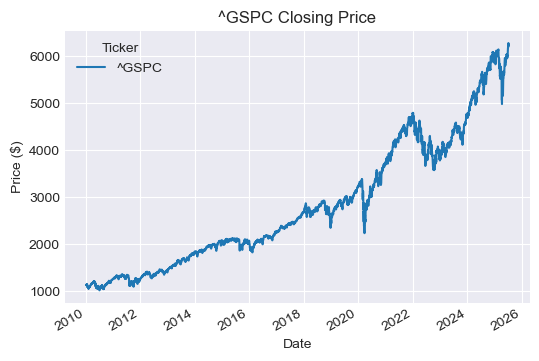

In [4]:
df['Close'].plot(figsize=(6,4), title=f"{ticker} Closing Price", ylabel='Price ($)')
plt.show()

In [5]:
df.isnull().sum()

Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64

In [6]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

df = df[['Close']]

/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_2454/145915488.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').last()


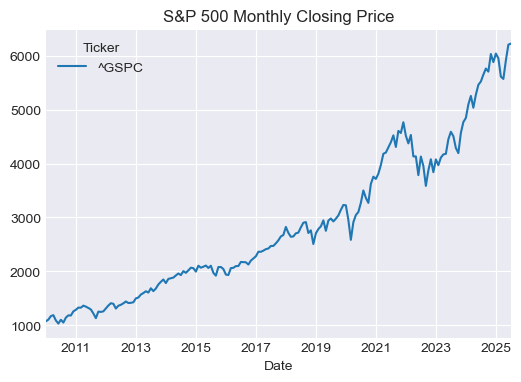

In [7]:
monthly_df = df.resample('M').last()

monthly_df['Close'].plot(figsize=(6,4), title = 'S&P 500 Monthly Closing Price')
plt.show()

In [8]:
df['Return'] = df['Close'].pct_change()

df = df.dropna()

In [9]:
yearly_prices = df['Close'].resample('A').last()
yearly_prices.head()

/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_2454/860718416.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_prices = df['Close'].resample('A').last()


Ticker,^GSPC
Date,
2010-12-31,1257.640015
2011-12-31,1257.599976
2012-12-31,1426.189941
2013-12-31,1848.359985
2014-12-31,2058.899902


In [10]:
quarterly_prices = df['Close'].resample('Q').last()
quarterly_prices.head()

/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_2454/999007428.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_prices = df['Close'].resample('Q').last()


Ticker,^GSPC
Date,
2010-03-31,1169.430054
2010-06-30,1030.709961
2010-09-30,1141.199951
2010-12-31,1257.640015
2011-03-31,1325.829956


In [11]:
yearly_returns = yearly_prices.pct_change().dropna()
yearly_returns.name = 'Yearly Return'
yearly_returns.head()

Ticker,^GSPC
Date,
2011-12-31,-0.000032
2012-12-31,0.134057
2013-12-31,0.296012
2014-12-31,0.113906
2015-12-31,-0.007266


In [12]:
quarterly_returns = quarterly_prices.pct_change().dropna()
quarterly_returns.name = 'Quarterly Return'
quarterly_returns.head()

Ticker,^GSPC
Date,
2010-06-30,-0.118622
2010-09-30,0.107198
2010-12-31,0.102033
2011-03-31,0.054221
2011-06-30,-0.003914


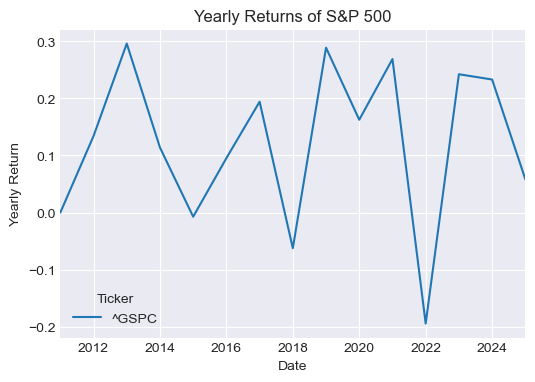

In [13]:
yearly_returns.plot(figsize=(6,4), title = 'Yearly Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Yearly Return')
plt.show()

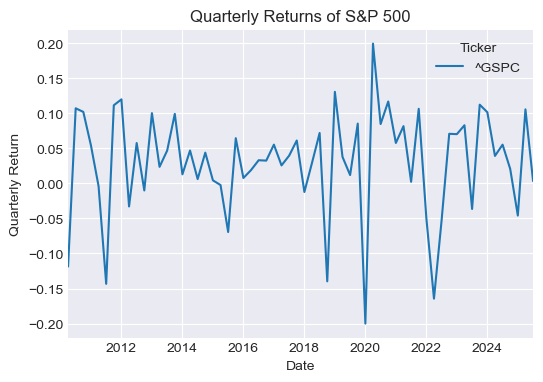

In [14]:
quarterly_returns.plot(figsize=(6,4), title = 'Quarterly Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Quarterly Return')
plt.show()

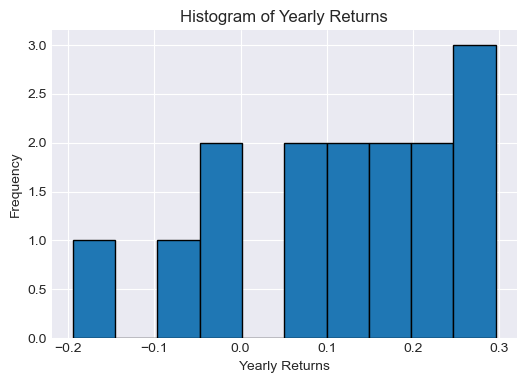

In [15]:
yearly_returns.hist(bins = 10, figsize=(6,4), edgecolor = 'black')
plt.title('Histogram of Yearly Returns')
plt.xlabel('Yearly Returns')
plt.ylabel('Frequency')
plt.show()

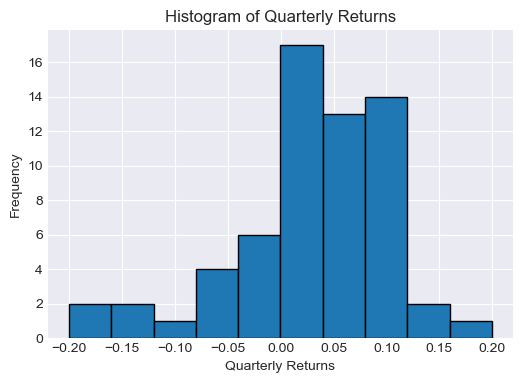

In [16]:
quarterly_returns.hist(bins = 10, figsize=(6,4), edgecolor = 'black')
plt.title('Histogram of Quarterly Returns')
plt.xlabel('Quarterly Returns')
plt.ylabel('Frequency')
plt.show()

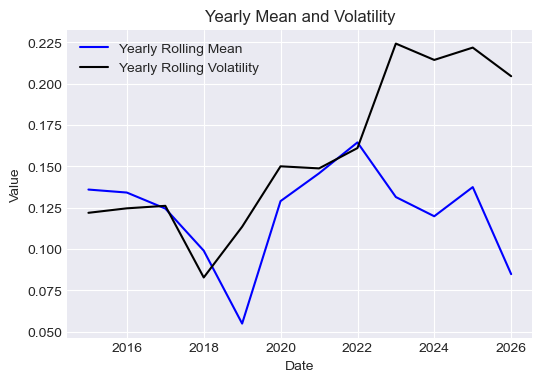

In [17]:
yearly_rolling_mean = yearly_returns.rolling(window = 4).mean()
yearly_rolling_std = yearly_returns.rolling(window = 4).std()

plt.figure(figsize=(6,4))
plt.plot(yearly_rolling_mean, label = 'Yearly Rolling Mean', color = 'Blue')
plt.plot(yearly_rolling_std, label = 'Yearly Rolling Volatility', color = 'Black')
plt.title("Yearly Mean and Volatility")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

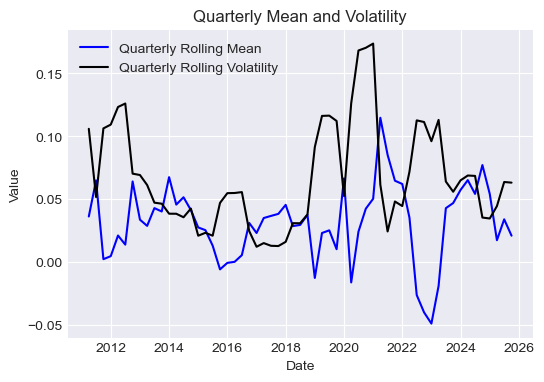

In [18]:
quarterly_rolling_mean = quarterly_returns.rolling(window = 4).mean()
quarterly_rolling_std = quarterly_returns.rolling(window = 4).std()

plt.figure(figsize=(6,4))
plt.plot(quarterly_rolling_mean, label = 'Quarterly Rolling Mean', color = 'Blue')
plt.plot(quarterly_rolling_std, label = 'Quarterly Rolling Volatility', color = 'Black')
plt.title("Quarterly Mean and Volatility")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [19]:
df['Return'].describe()

count    3900.000000
mean        0.000498
std         0.011021
min        -0.119841
25%        -0.003841
50%         0.000692
75%         0.005711
max         0.095154
Name: Return, dtype: float64

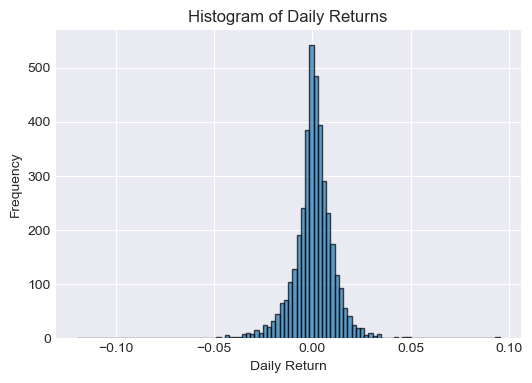

In [20]:
df['Return'].hist(bins = 100, figsize=(6,4), alpha = 0.7, edgecolor = 'black')
plt.title("Histogram of Daily Returns")
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

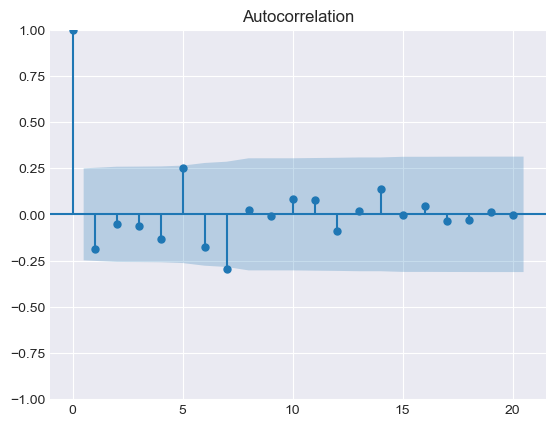

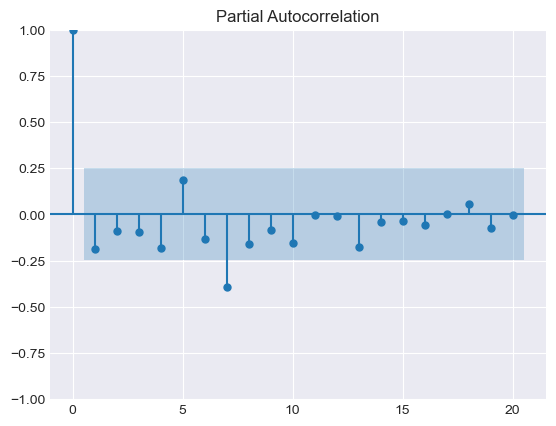

In [22]:
plot_acf(quarterly_returns, lags = 20)
plt.show()

plot_pacf(quarterly_returns, lags = 20)
plt.show()

In [23]:
model = ARIMA(quarterly_returns, order=(1,0,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                   62
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  78.284
Date:                Thu, 07 Aug 2025   AIC                           -148.567
Time:                        14:09:56   BIC                           -140.059
Sample:                    06-30-2010   HQIC                          -145.227
                         - 09-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0301      0.002     16.848      0.000       0.027       0.034
ar.L1          0.6102      0.177      3.441      0.001       0.263       0.958
ma.L1         -0.9994      5.775     -0.173      0.8

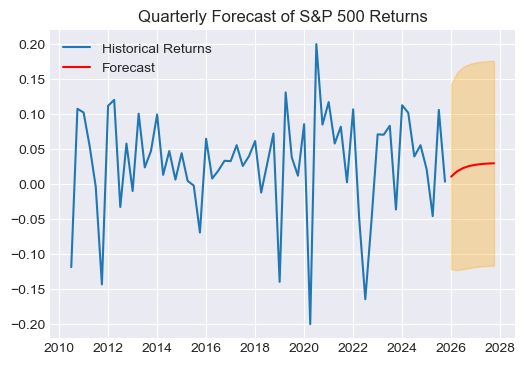

In [24]:
forecast = model_fit.get_forecast(steps = 8)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(6,4))
plt.plot(quarterly_returns, label = 'Historical Returns')
plt.plot(forecast_mean, label = 'Forecast', color = 'Red')
plt.fill_between(forecast_mean.index,
                conf_int.iloc[:, 0], conf_int.iloc[:, 1], color = 'orange', alpha = 0.3)

plt.title("Quarterly Forecast of S&P 500 Returns")
plt.legend()
plt.show()

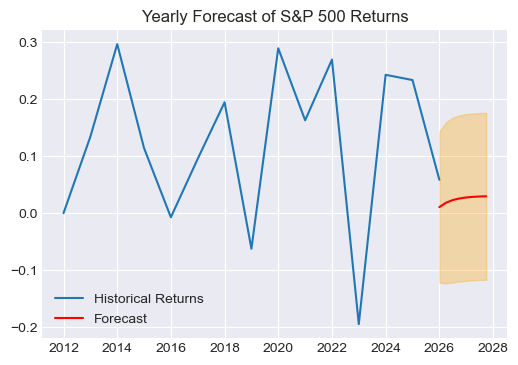

In [25]:
forecast = model_fit.get_forecast(steps = 8)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(6,4))
plt.plot(yearly_returns, label = 'Historical Returns')
plt.plot(forecast_mean, label = 'Forecast', color = 'Red')
plt.fill_between(forecast_mean.index,
                conf_int.iloc[:, 0], conf_int.iloc[:, 1], color = 'orange', alpha = 0.3)

plt.title("Yearly Forecast of S&P 500 Returns")
plt.legend()
plt.show()

## Step 4:- ARIMA Order Selection and Model Evaluation

In [26]:
split_index = int(len(quarterly_returns) * 0.8)

train = quarterly_returns[:split_index]
test = quarterly_returns[split_index:]

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

orders = [(1,0,0), (0,0,1), (1,0,1), (2,0,2), (2,1,2)]

for order in orders:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        print(f"ARIMA{order} : AIC: {model_fit.aic:.2f}")

    except:
        continue

RMSE: 0.0595
ARIMA(1, 0, 0) : AIC: -107.38
ARIMA(0, 0, 1) : AIC: -108.77
ARIMA(1, 0, 1) : AIC: -111.41
ARIMA(2, 0, 2) : AIC: -108.46
ARIMA(2, 1, 2) : AIC: -98.61


In [28]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.5/927.5 kB 4.1 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
from arch import arch_model

model = arch_model(quarterly_returns.dropna(), vol = 'Garch', p=1, q=1)
garch_result = model.fit(update_freq = 1)

print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1930464.1167070994
Iteration:      2,   Func. Count:     15,   Neg. LLF: 34423759.805985376
Iteration:      3,   Func. Count:     22,   Neg. LLF: -72.8501936785477
Iteration:      4,   Func. Count:     28,   Neg. LLF: -18.285641983925895
Iteration:      5,   Func. Count:     35,   Neg. LLF: -74.75802649709797
Iteration:      6,   Func. Count:     40,   Neg. LLF: -70.41085224215996
Iteration:      7,   Func. Count:     46,   Neg. LLF: -74.92634521067077
Iteration:      8,   Func. Count:     51,   Neg. LLF: -75.04826937396714
Iteration:      9,   Func. Count:     56,   Neg. LLF: -75.11156164604695
Iteration:     10,   Func. Count:     61,   Neg. LLF: -75.15555395261708
Iteration:     11,   Func. Count:     66,   Neg. LLF: -75.18662690451642
Iteration:     12,   Func. Count:     71,   Neg. LLF: -75.20109062230419
Iteration:     13,   Func. Count:     76,   Neg. LLF: -75.20119127759328
Iteration:     14,   Func. Count:     81,   Neg. LL

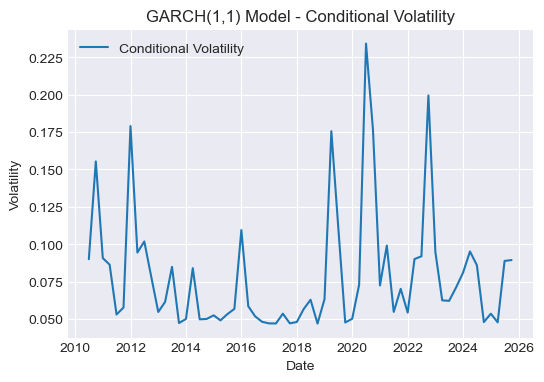

In [30]:
plt.figure(figsize=(6,4))
plt.plot(garch_result.conditional_volatility, label = 'Conditional Volatility')
plt.title('GARCH(1,1) Model - Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()